In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터 셋 불러오기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input,Reshape, Flatten, Reshape
from tensorflow.keras.layers import Embedding , LSTM, BatchNormalization, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Conv1D, MaxPooling2D

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = x_train.reshape(X_train.shape[0],28,28,1).\
                                    astype('float32')/ 255
X_test = x_test.reshape(X_test.shape[0],28,28,1).\
                                    astype('float32')/ 255

In [4]:
autoencoder = Sequential() 

In [5]:
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))

In [6]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [7]:
# encoding
autoencoder.add(MaxPooling2D(pool_size=2, padding='same')) # 사이즈는 줄지만 다시 원래대로 돌아오기 때문에 문제없음


In [8]:
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same')) # 사이즈를 3으로 다시 통과 시킨다

In [9]:
autoencoder.add(MaxPooling2D(pool_size=2, padding='same')) 

In [10]:
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [11]:
# Decoding
# stries를 알기 때문에 현재 사이즈가 어떻게 되는지 계산 할 수 있어야 한다.
# 다시 원래 사이즈로 돌려야 하기 때문에 현재 사이즈를 알아야 할필요성이 있음

autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

autoencoder.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 38s 80ms/step - loss: 0.2046 - val_loss: 0.1345
Epoch 2/50
469/469 [==============================] - 37s 80ms/step - loss: 0.1259 - val_loss: 0.1183
Epoch 3/50
469/469 [==============================] - 38s 80ms/step - loss: 0.1149 - val_loss: 0.1101
Epoch 4/50
469/469 [==============================] - 38s 80ms/step - loss: 0.1088 - val_loss: 0.1056
Epoch 5/50
469/469 [==============================] - 36s 76ms/step - loss: 0.1051 - val_loss: 0.1030
Epoch 6/50
469/469 [==============================] - 39s 83ms/step - loss: 0.1025 - val_loss: 0.1002
Epoch 7/50
469/469 [==============================] - 37s 79ms/step - loss: 0.1003 - val_loss: 0.0981
Epoch 8/50
469/469 [==============================] - 37s 80ms/step - loss: 0.0986 - val_loss: 0.0967
Epoch 9/50
469/469 [==============================] - 38s 80ms/step - loss: 0.0973 - val_loss: 0.0963
Epoch 10/50
469/469 [==============================] - 38s 81ms/step - loss: 0.096

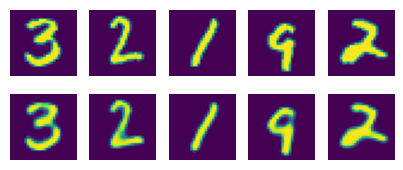

In [13]:
random_test = np.random.randint(X_test.shape[0], size=5)  #테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))  #출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()